This code is the dummy code that:

Input: 
- random "fidelity" F from 0 to 1
- property P that was calculated from F

Output:
- Macchine learned `model` that given P output a predicted F

In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from qutip import *
import matplotlib.pyplot as plt
from visualisation_tools import *
from model_generator import *
from qsq_protocol import *

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "text.usetex": False, # Remove this line if your code doesn't run/ take too long
    "font.family": 'Times New Roman',
    "figure.dpi": 100,
    "font.size": 14
})

In [2]:
experiment_prob_failing(rho_ideal,S_gate,M_ideal)
average_fidelity(rho_ideal,S_gate,M_ideal)

np.float64(1.0)

In [3]:
rho_exp = rand_dm(2)
M_exp = ket2dm(rand_ket(2))
gate_exp = rand_unitary(2)
experiment_prob_failing(rho_exp,gate_exp,M_exp)
average_fidelity(rho_exp,gate_exp,M_exp)

np.float64(0.665388)

In [4]:
def depolarize(rho, p):
    """Apply depolarizing noise with probability p to state rho."""
    dim = rho.shape[0]
    return (1 - p) * rho + p * qeye(dim) / dim

In [6]:
import itertools
import random

# Number of units and iterations

N_uniform = 5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
N_random = 100
N_perturbed = 5

# Example: Generate a grid of 20 theta steps and 40 phi steps 
theta_steps = 5 # Number of steps for theta (polar angle) 
phi_steps = 5 # Number of steps for phi (azimuthal angle) 
density_matrices = generate_uniform_rho(theta_steps, phi_steps) 
# Check that there's no repetitions 
uniform_dm = [] 
seen_matrices = set() 
for rho in density_matrices: 
    matrix_repr = str(rho) # Convert Qobj to its string representation 
    if matrix_repr not in seen_matrices: 
        uniform_dm.append(rho)
        seen_matrices.add(matrix_repr)
# Generate uniform unitary matrices and data
uniform_U = generate_random_unitaries(N_uniform)
uniform_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(uniform_dm, uniform_U, uniform_dm)]


# Generate random data
random_data = []
for i in range(N_random):
    rho_exp = rand_dm(2).unit()
    M_exp = ket2dm(rand_ket(2)).unit()
    gate_exp = rand_unitary(2).unit()
    random_data.append([rho_exp,M_exp,gate_exp])

# Generate perturbed unitary matrices and data
perturbed_dm = generate_perturbed_rho(rho_ideal,N_perturbed)
perturbed_U = generate_perturbed_unitary(S_gate,N_perturbed)

perturbed_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(perturbed_dm, perturbed_U, perturbed_dm)]


# Combine all data into one list
full_data = random_data + uniform_data + perturbed_data

# Shuffle the combined data
def split_data(data, test_size=0.2):
    """
    Split the data into training and testing sets.

    Args:
        data: List of data to split.
        test_size: Fraction of the data to use for testing (default 0.2 for 20% test data).

    Returns:
        train_data: Data for training.
        test_data: Data for testing.
    """
    # Shuffle the data to ensure randomness
    random.shuffle(data)

    # Calculate the split index
    split_index = int(len(data) * (1 - test_size))

    # Split the data
    training_data = data[:split_index]
    test_data = data[split_index:]

    return training_data, test_data

training_data, test_data = split_data(full_data)
# training_data = full_data

# Print the lengths of all datasets
print(f"Length of uniform_data: {len(uniform_data)}")
print(f"Length of random_data: {len(random_data)}")
print(f"Length of perturbed_data: {len(perturbed_data)}")
print(f"Length of training_data: {len(training_data)}")


Length of uniform_data: 1445
Length of random_data: 100
Length of perturbed_data: 125
Length of training_data: 1336


In [8]:
import itertools
import random

# Constants
N_uniform, N_random, N_perturbed = 5, 100, 5
theta_steps, phi_steps = 5, 5

# Generate data

uniform_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(generate_uniform_rho(theta_steps, phi_steps) , generate_random_unitaries(N_uniform), generate_uniform_rho(theta_steps, phi_steps) )]

random_data = [[rand_dm(2).unit(), ket2dm(rand_ket(2)).unit(), rand_unitary(2).unit()] for _ in range(N_random)]

perturbed_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(generate_perturbed_rho(rho_ideal, N_perturbed), generate_perturbed_unitary(S_gate, N_perturbed), generate_perturbed_rho(rho_ideal, N_perturbed))]

# Combine, shuffle and split data
full_data = random_data + uniform_data + perturbed_data
random.shuffle(full_data)

split_data = lambda data, test_size=0.2: (data[:int(len(data)*(1-test_size))], data[int(len(data)*(1-test_size)):])
training_data, test_data = split_data(full_data)

# Print lengths
print(f"Length of uniform_data: {len(uniform_data)}")
print(f"Length of random_data: {len(random_data)}")
print(f"Length of perturbed_data: {len(perturbed_data)}")
print(f"Length of training_data: {len(training_data)}")


Length of uniform_data: 3125
Length of random_data: 100
Length of perturbed_data: 125
Length of training_data: 2680


In [10]:
import itertools
import random

# Constants
N_uniform, N_random, N_perturbed = 5, 100, 5
theta_steps, phi_steps = 5, 5

# Generate data
uniform_dm = {str(rho): rho for rho in generate_uniform_rho(theta_steps, phi_steps)}
uniform_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(list(uniform_dm.values()), generate_random_unitaries(N_uniform), list(uniform_dm.values()))]

random_data = [[rand_dm(2).unit(), ket2dm(rand_ket(2)).unit(), rand_unitary(2).unit()] for _ in range(N_random)]

perturbed_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(generate_perturbed_rho(rho_ideal, N_perturbed), generate_perturbed_unitary(S_gate, N_perturbed), generate_perturbed_rho(rho_ideal, N_perturbed))]

# Combine, shuffle and split data
full_data = random_data + uniform_data + perturbed_data
random.shuffle(full_data)

split_data = lambda data, test_size=0.2: (data[:int(len(data)*(1-test_size))], data[int(len(data)*(1-test_size)):])
training_data, test_data = split_data(full_data)

# Print lengths
print(f"Length of uniform_data: {len(uniform_data)}")
print(f"Length of random_data: {len(random_data)}")
print(f"Length of perturbed_data: {len(perturbed_data)}")
print(f"Length of training_data: {len(training_data)}")


Length of uniform_data: 1445
Length of random_data: 100
Length of perturbed_data: 125
Length of training_data: 1336


In [11]:
F_naive = []
F = []
P = []
for datum in training_data:
    rho_exp = datum[0]
    gate_exp = datum[1]
    M_exp = datum[2]
    raw_fid = average_fidelity(rho_exp,gate_exp,M_exp)
    if raw_fid >0.7:
        F_naive.append(raw_fid)
        F.append(average_fidelity_gauge(rho_exp,gate_exp,M_exp))
        P.append(experiment_prob_failing(rho_exp,gate_exp,M_exp))

print(f"Length of input fidelity: {len(F)}")

d:\Program Files\python\Lib\site-packages\qutip\core\data\expm.py:136: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  return Dense(scipy.linalg.sqrtm(matrix.as_ndarray()))


Length of input fidelity: 290


In [12]:
indices = [i for i, f in enumerate(F) if f > 0.7]

F_filtered = [F[i] for i in indices]
P_filtered = [P[i] for i in indices]


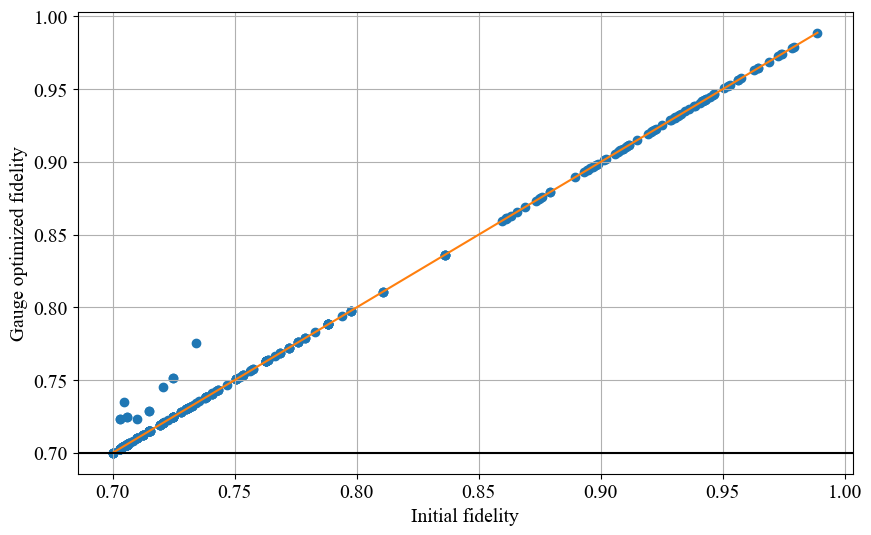

In [13]:
plt.scatter(F_naive,F)
plt.plot([min(F_naive),max(F_naive)],[min(F_naive),max(F_naive)],color = 'C1')
plt.xlabel('Initial fidelity')
plt.ylabel('Gauge optimized fidelity')
plt.grid()
plt.axhline(y=0.7,color='k')

Text(0.5, 1.0, 'Distribution of Input data')

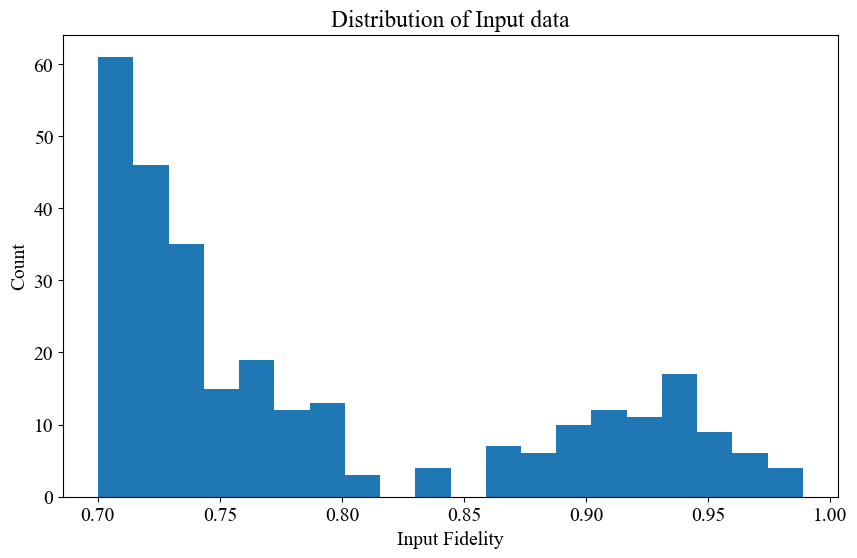

In [14]:
plt.hist(F_naive,bins=20)
plt.xlabel('Input Fidelity')
plt.ylabel('Count')
plt.title('Distribution of Input data')

In [15]:
# Convert to PyTorch tensors
X = torch.tensor(P_filtered, dtype=torch.float32)   # inputs: 3 probabilities
y = torch.tensor(F_filtered, dtype=torch.float32).unsqueeze(1)  # output: fidelity

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# -----------------------------
# Simple MLP model
# -----------------------------
# model = nn.Sequential(
#     nn.Linear(3, 32),
#     nn.ReLU(),
#     nn.Linear(32, 32),
#     nn.ReLU(),
#     nn.Linear(32, 1)
# )

model = nn.Sequential(
    nn.Linear(3, 64),
    nn.ReLU(),
    # nn.Dropout(0.3),
    nn.Linear(64, 64),
    nn.ReLU(),
    # nn.Dropout(0.3),
    nn.Linear(64, 32),
    nn.ReLU(),
    # nn.Dropout(0.3),
    nn.Linear(32, 1)
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# -----------------------------
# Training loop
# -----------------------------
epochs = 50
for epoch in range(epochs):
    for xb, yb in dataloader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")


Epoch 10, Loss: 0.018380
Epoch 20, Loss: 0.008960
Epoch 30, Loss: 0.005692
Epoch 40, Loss: 0.007996
Epoch 50, Loss: 0.004420


In [16]:
# perturbed_dm = generate_perturbed_rho(rho_ideal,np.linspace(0.01,0.1,10))
# perturbed_U = generate_perturbed_unitary(S_gate,10)
# test_data = [(dm1, unitary, dm2) for dm1, unitary, dm2 in itertools.product(perturbed_dm, perturbed_U, perturbed_dm)]
# random.shuffle(test_data)

In [17]:
# -----------------------------
# Test prediction
# -----------------------------
true_fidelities = []
pred_fidelities = []

# Loop over multiple test cases
for datum in test_data:
    rho_exp = datum[0]
    gate_exp = datum[1]
    M_exp = datum[2]
    # Get the test probability and fidelity
    raw_test_F = average_fidelity(rho_exp, gate_exp, M_exp)
    if raw_test_F > 0.7:
        test_P = torch.tensor(experiment_prob_failing(rho_exp, gate_exp, M_exp)).unsqueeze(0)  # Batch dimension (1 sample)
        test_F = average_fidelity_gauge(rho_exp, gate_exp, M_exp)

        # Get the model prediction
        pred_F = model(test_P).detach().numpy().flatten()

        # Store the results
        true_fidelities.append(test_F)
        pred_fidelities.append(pred_F)

# Convert lists to numpy arrays for plotting
true_fidelities = np.array(true_fidelities)
pred_fidelities = np.array(pred_fidelities)

d:\Program Files\python\Lib\site-packages\qutip\core\data\expm.py:136: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  return Dense(scipy.linalg.sqrtm(matrix.as_ndarray()))


C:\Users\XPS13-9360\AppData\Local\Temp\ipykernel_7812\2737985453.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([min(true_fidelities), max(true_fidelities)], [min(true_fidelities), max(true_fidelities)], 'r--', color='C1', label='Ideal 1:1 Line')


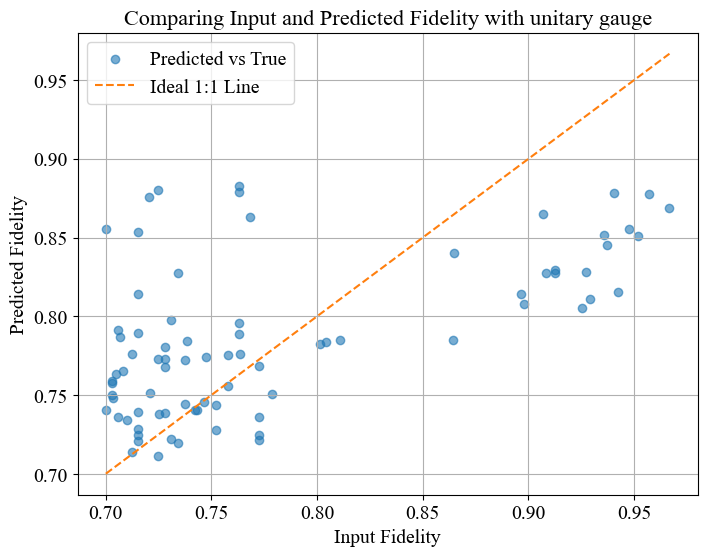

In [18]:
# -----------------------------
# Plot results
# -----------------------------
plt.figure(figsize=(8, 6))

# Scatter plot of true vs predicted fidelities
plt.scatter(true_fidelities, pred_fidelities, label='Predicted vs True', alpha=0.6)

# Plot ideal 1:1 line (perfect prediction)
plt.plot([min(true_fidelities), max(true_fidelities)], [min(true_fidelities), max(true_fidelities)], 'r--', color='C1', label='Ideal 1:1 Line')

# Labels and title
plt.xlabel("Input Fidelity", fontsize=14)
plt.ylabel("Predicted Fidelity", fontsize=14)
plt.title("Comparing Input and Predicted Fidelity with unitary gauge", fontsize=16)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()